 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [115]:
# Initial imports. To avoid unnecessary warnings(system generated), I imported warnings to ignore future-warnings. 

import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns



import matplotlib.pyplot as plt
%matplotlib inline
print(Path.cwd())

/Users/yasbhatti/homework/Pandas-homework


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [116]:
# Reading whale returns

whale_path = Path.cwd() / ("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(ascending = True, inplace = True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [117]:
# Count nulls

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [118]:
# Drop nulls

whale_df.dropna(inplace = True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [119]:
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns 
Read the algorithmic daily returns and clean the data

In [120]:
# Reading algorithmic returns

algo_path = Path.cwd() / ("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending = True, inplace = True)
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [121]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [122]:
# Drop nulls

algo_df.dropna(inplace = True)

In [123]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [124]:
# Reading S&P 500 Closing Prices

sp500_path = Path.cwd() / ("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(ascending = True, inplace = True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [125]:
# Check Data Types

sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [126]:
# Rename `Close` Column to be specific to this portfolio.

col_name = ['Sp500_Close']
sp500_df.columns = col_name
sp500_df.head()

,Sp500_Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [127]:
# Remove $ sign from dataframe

sp500_df['Sp500_Close'] = sp500_df['Sp500_Close'].str.replace('$', '')
sp500_df['Sp500_Close'].head()

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
Name: Sp500_Close, dtype: object

In [128]:
# Fix Data Types (from object to float)

sp500_df = sp500_df['Sp500_Close'].astype('float')

In [129]:
# Calculate Daily Returns

sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

Date
2012-10-01         NaN
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
Name: Sp500_Close, dtype: float64

In [130]:
# Drop nulls

sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

Date
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
2012-10-08   -0.003457
Name: Sp500_Close, dtype: float64

-----

## Combine Whale, Algorithmic, and S&P 500 Returns

In [131]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns
# into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis = 'columns', join = 'inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

Text(0, 0.5, 'Daily Returns')

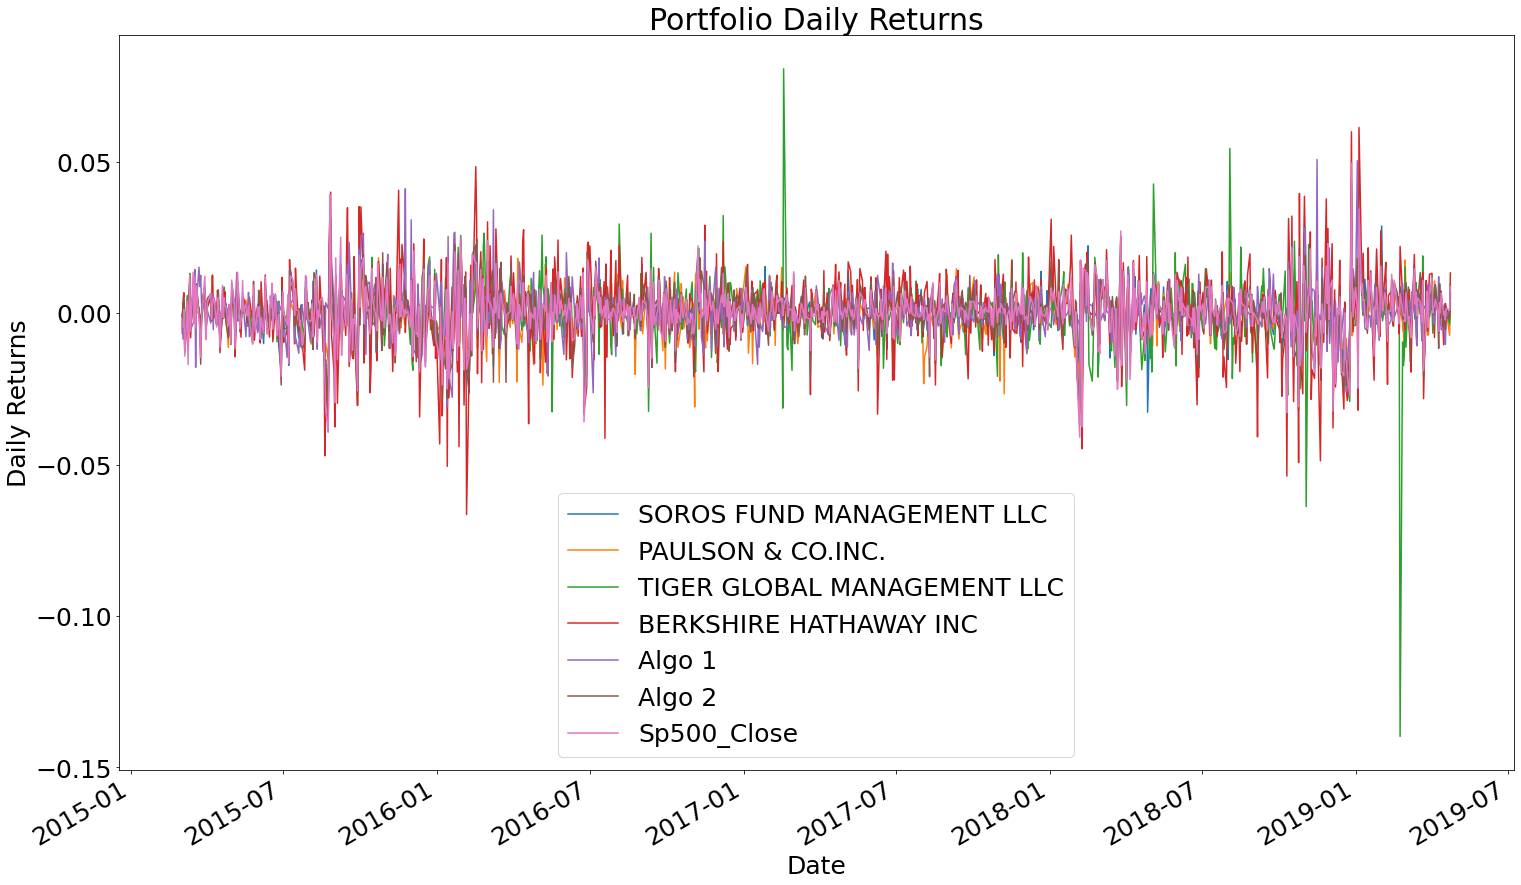

In [132]:
# Plot combined daily returns (set parameters and size the graph)

plt.rcParams.update({'font.size': 25})
pl = combined_df.plot(figsize = (25, 15), legend= True)
pl.set_title("Portfolio Daily Returns")
pl.set_xlabel("Date")
pl.set_ylabel("Daily Returns")

#### Calculate and Plot cumulative returns.

Text(0, 0.5, 'Daily Returns')

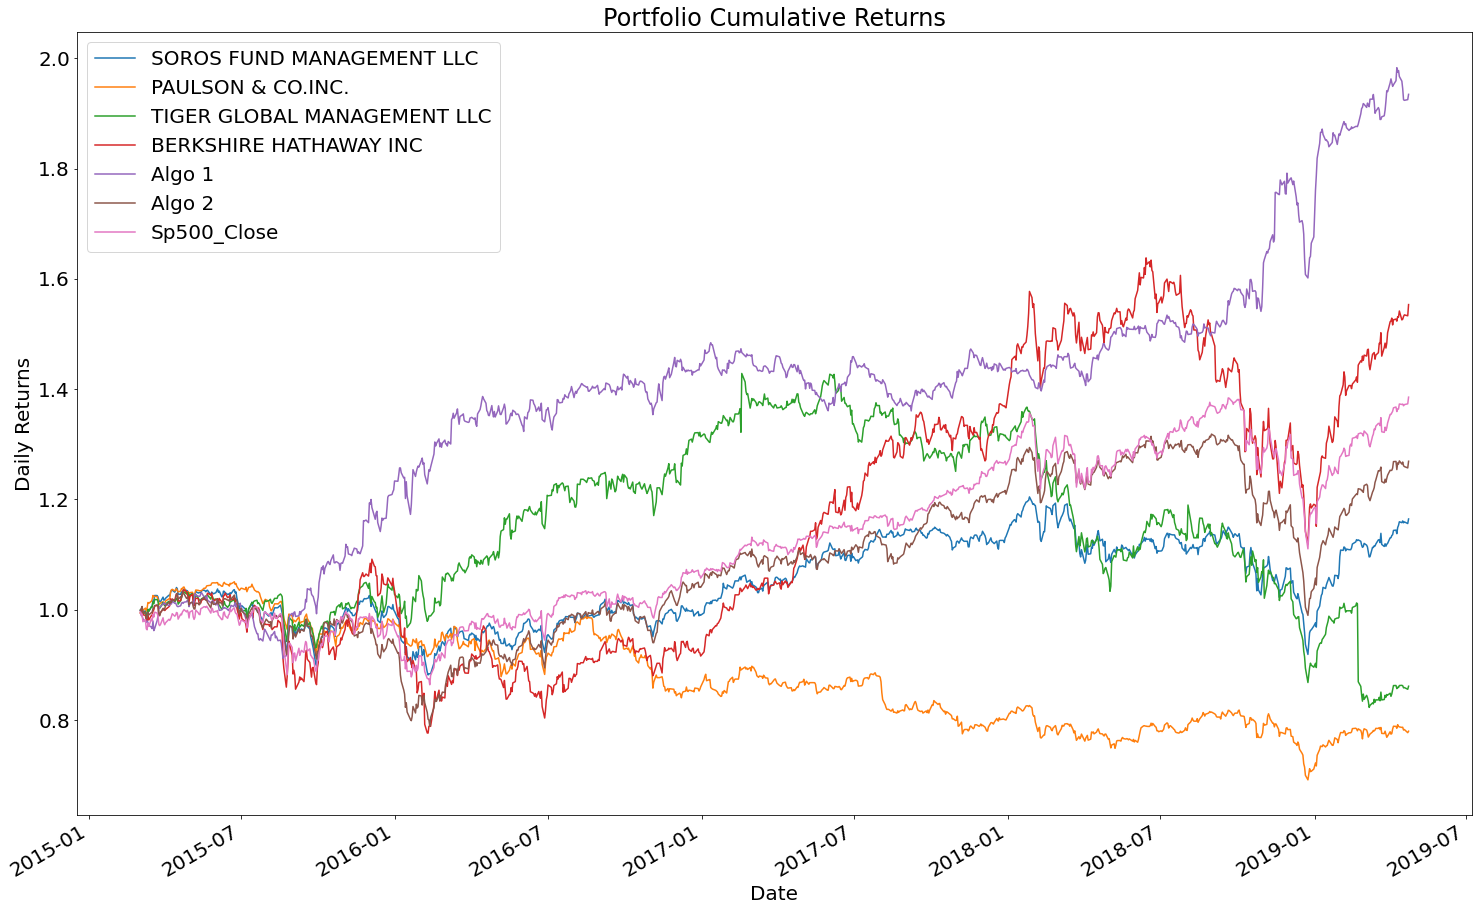

In [133]:
# Calculate cumulative returns of all portfolios

combined_daily_returns = (1 + combined_df).cumprod()

# Plot cumulative returns (set parameters and size the graph)

plt.rcParams.update({'font.size': 20})
pl = combined_daily_returns.plot(figsize=(25, 16), legend= True)
pl.set_title("Portfolio Cumulative Returns")
pl.set_xlabel("Date")
pl.set_ylabel("Daily Returns")


## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk Analysis'}>

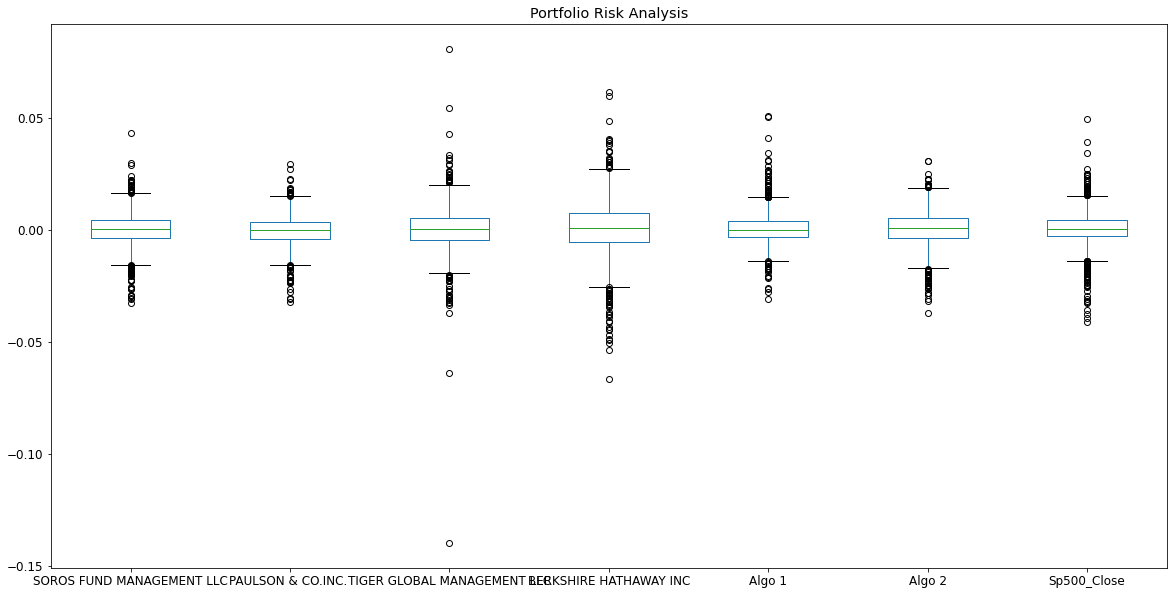

In [134]:
# Box plot to visually show risk (set parameters and size the graph)

plt.rcParams.update({'font.size': 12})
combined_df.plot(kind='box', figsize=(20, 10), title ='Portfolio Risk Analysis')

### Calculate Standard Deviations

In [135]:
# Calculate the daily standard deviations of all portfolios

combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
Sp500_Close                    0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [136]:
# Risk(std) Comparison [portfolio vs market (S&P 500)]

combined_df.std() > combined_df['Sp500_Close'].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
Sp500_Close                    False
dtype: bool

### Calculate the Annualized Standard Deviation

In [137]:
# Calculate the annualized standard deviation (252 trading days)

combined_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
Sp500_Close                    0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling (21-days) Standard Deviation'}, xlabel='Date'>

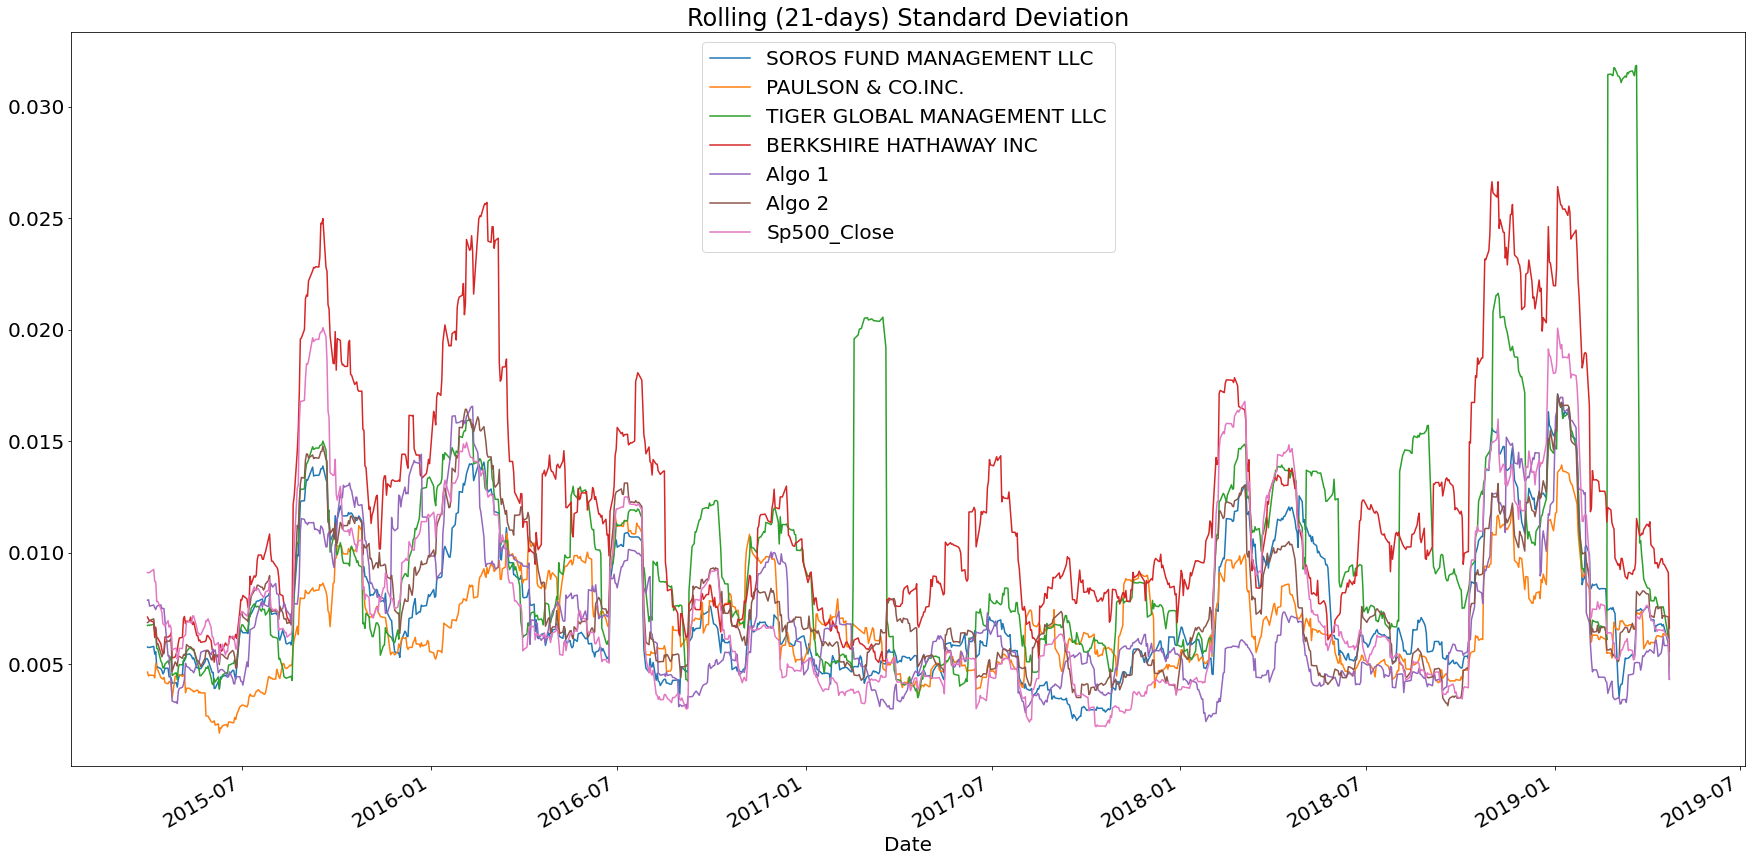

In [138]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_df_roll = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation (set parameters and size the graph)

plt.rcParams.update({'font.size': 20})
combined_df_roll.plot(figsize=(30,15), title= "Rolling (21-days) Standard Deviation")

### Calculate and plot the correlation

In [139]:
# Calculate the correlation

combined_df_correlation = combined_df.corr()

# Display de correlation matrix

combined_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
Sp500_Close,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


Text(0.5, 1.0, 'Portfolio Correlation Map')

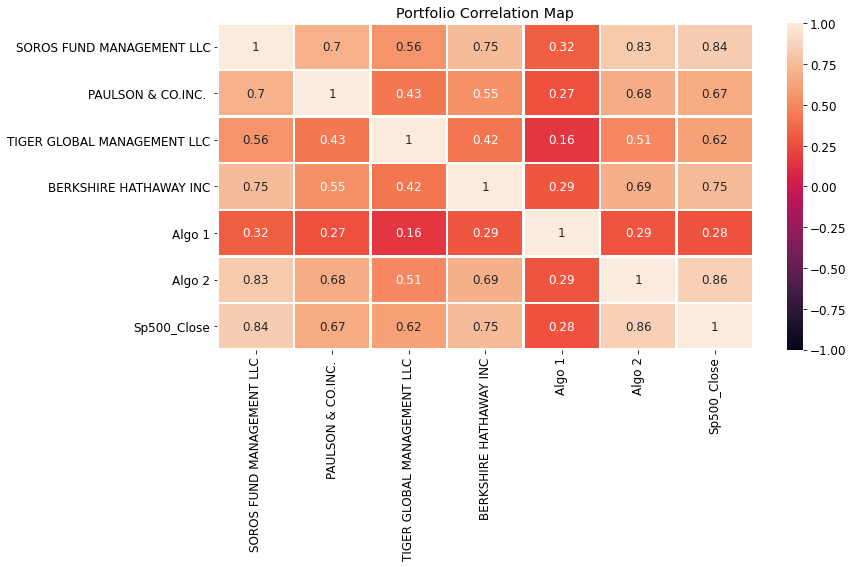

In [140]:
# Plot correlation using SNS-heatmap (set parameters and size the graph)

plt.rcParams.update({'font.size': 12})
ac = plt.subplots(figsize=(12,6))
ac= sns.heatmap(round(combined_df_correlation, 3), vmin=-1, vmax=1, annot=True, linewidths=1.5)
ac.set_title("Portfolio Correlation Map")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [141]:
# Calculate covariance of a single portfolio (chose Warren Buffett's 
# BERKSHIRE HATHAWAY INC -using rolling 60 days window)

single_df_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['Sp500_Close'])

# Calculate variance of S&P 500 (rolling 60 days window)

sp500_variance = combined_df['Sp500_Close'].rolling(window=60).var()

In [142]:
# Computing beta

single_df_beta = single_df_covariance / sp500_variance

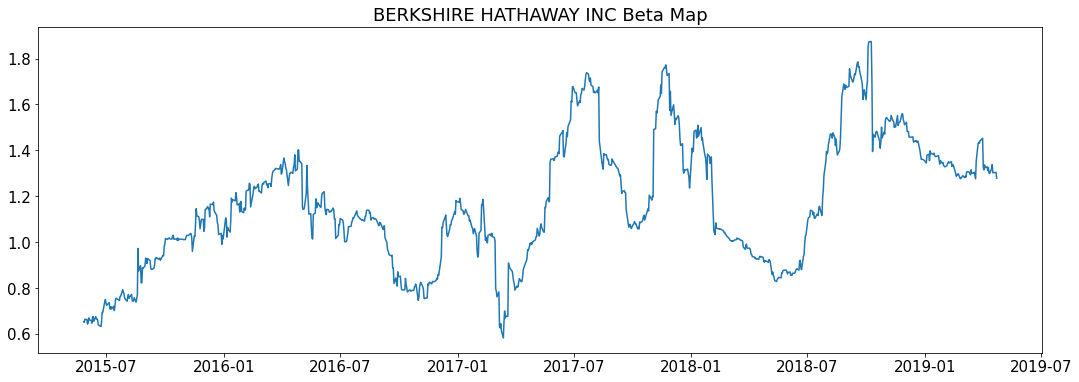

In [143]:
# Plot beta (set parameters and size the graph)

plt.rcParams.update({'font.size': 15})
plt.subplots(figsize=(18,6))
plt.title(("BERKSHIRE HATHAWAY INC Beta Map"))
plt.plot(single_df_beta)


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling (21-days) Exponentially Weighted Moving Average'}, xlabel='Date'>

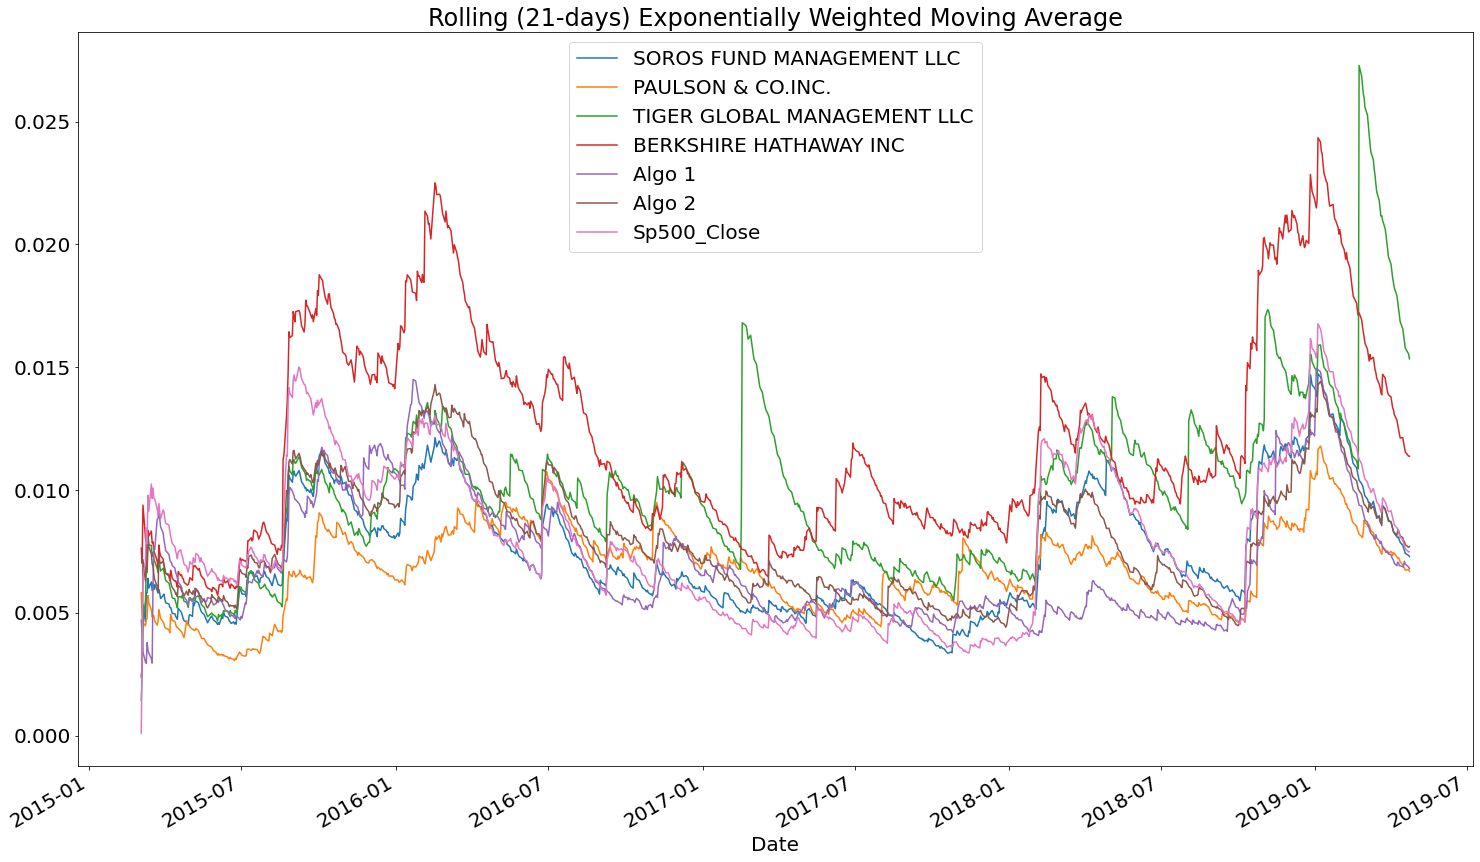

In [144]:
# Calculate the Exponentially Weighted Moving Average (EWM) using 21-day half-life
# Note: For all of my Rolling calculations, I used standard deviation which I applied in EWA calculations.
# But one can replace, if desired,  STD to other calculating parameters.

combined_df_ewm = combined_df.ewm(halflife=21).std()

# Plot EWM (set parameters and size the graph)

plt.rcParams.update({'font.size': 20})
combined_df_ewm.plot(figsize=(25,15), title= "Rolling (21-days) Exponentially Weighted Moving Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [145]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
Sp500_Close                    0.648267
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios Analysis'}>

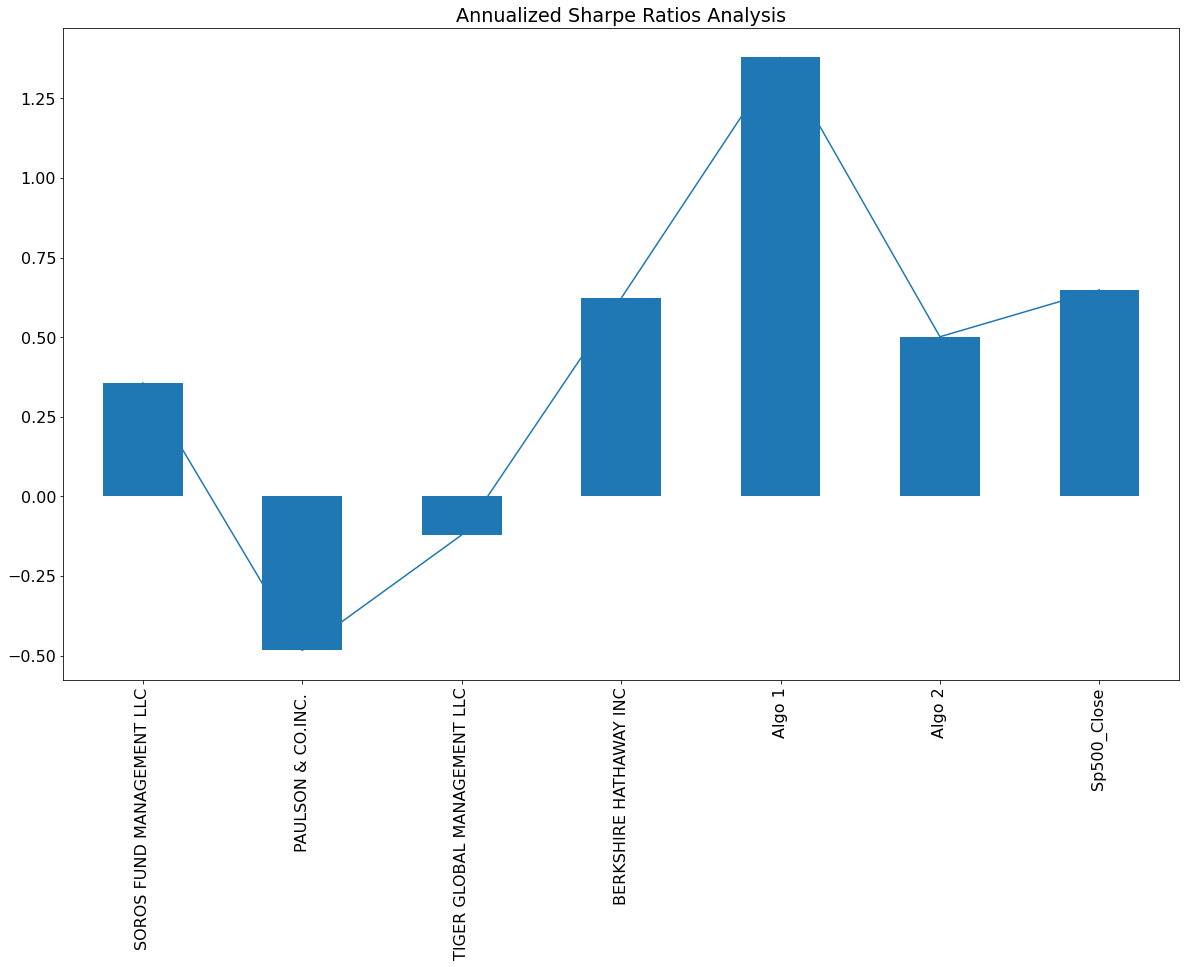

In [146]:
# Visualize the sharpe ratios as a bar plot (set parameters and size the graph)
# I used both bar and line graphs(merged-in) for better visualization

plt.rcParams.update({'font.size': 16})
sharpe_ratios.plot(figsize = (20, 12))
sharpe_ratios.plot(kind='bar', title = "Annualized Sharpe Ratios Analysis")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

## Takeaways:

- Algo1 (1st algorithmic strategy) outperformed both the market(S&P 500) and the Whale Portfolios.
- TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC were the riskiest portfolios. With one caveat:
  even though BERKSHIRE HATHAWAY INC was one of the riskiest portfolios, it did outperform the market at     the end. Conversely; Paulson & Company was one of the LEAST riskiest portfolios, but it performed         miserably against the market (source: sharpe ratios).

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [147]:
# Selected 'GOOG', 'AAPL', 'COST' for my portfolio analysis using current data
# Reading data from 1st stock (current data). To compare at least one year worth of data with the other 
# above portfolios, I extracted and used approximately 4 years worth of data (04/24/2017 to 08/13/2021).

goog_path = Path.cwd() / ("Resources/GOOG_Close.csv")

# Read and Reset Date index. Rename the 'Close' column and sort by ascending format

goog_df = pd.read_csv(goog_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
goog_df.rename(columns={'Close': 'GOOG_Close'}, inplace = True)
goog_df.sort_index(ascending = True, inplace=True)
goog_df.head()  

,GOOG_Close
Date,
2017-04-24,862.76
2017-04-25,872.30
2017-04-26,871.73
2017-04-27,874.25
2017-04-28,905.96


In [148]:
# Reading data from 2nd stock (current data)

aapl_path = Path.cwd() / ("Resources/AAPL_Close.csv")

# Read and Reset Date index. Rename the Close column and sort by ascending format

aapl_df = pd.read_csv(aapl_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
aapl_df.rename(columns={'Close':'AAPL_Close'}, inplace=True)
aapl_df.sort_index(ascending = True, inplace= True)
aapl_df.head()  

,AAPL_Close
Date,
2017-04-24,35.91
2017-04-25,36.13
2017-04-26,35.92
2017-04-27,35.95
2017-04-28,35.91


In [149]:
# Reading data from 3rd stock (current data)

cost_path = Path.cwd() / ("Resources/COST_Close.csv")

# Read and Reset Date index. Rename the Close column and sort by ascending format

cost_df = pd.read_csv(cost_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
cost_df.rename(columns={'Close': 'COST_Close'}, inplace = True)
cost_df.sort_index(ascending= True, inplace=True)

cost_df.head()  

,COST_Close
Date,
2017-04-24,172.33
2017-04-25,172.68
2017-04-26,176.80
2017-04-27,177.45
2017-04-28,177.52


In [150]:
# Combine all stocks in a single DataFrame

combined_portfolio_df = pd.concat([goog_df, aapl_df, cost_df], axis ='columns', join ='inner')
combined_portfolio_df

,GOOG_Close,AAPL_Close,COST_Close
Date,,,
2017-04-24,862.76,35.91,172.33
2017-04-25,872.30,36.13,172.68
2017-04-26,871.73,35.92,176.80
2017-04-27,874.25,35.95,177.45
2017-04-28,905.96,35.91,177.52
...,...,...,...
2021-08-09,2760.04,146.09,440.47
2021-08-10,2761.93,145.60,443.03
2021-08-11,2753.79,145.86,444.30


In [151]:
# Calculate daily returns

combined_portfolio_daily_returns = combined_portfolio_df.pct_change()

# Drop NAs

combined_portfolio_daily_returns.dropna(inplace = True)

# Display sample data (first and last five)

combined_portfolio_daily_returns

,GOOG_Close,AAPL_Close,COST_Close
Date,,,
2017-04-25,0.011058,0.006126,0.002031
2017-04-26,-0.000653,-0.005812,0.023859
2017-04-27,0.002891,0.000835,0.003676
2017-04-28,0.036271,-0.001113,0.000394
2017-05-01,0.007296,0.020607,0.001915
...,...,...,...
2021-08-09,0.007049,-0.000342,0.001911
2021-08-10,0.000685,-0.003354,0.005812
2021-08-11,-0.002947,0.001786,0.002867


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [152]:
# Set weights

weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

weighted_portfolio_returns = combined_portfolio_daily_returns.dot(weights)

# Display sample data

weighted_portfolio_returns

Date
2017-04-25    0.006405
2017-04-26    0.005798
2017-04-27    0.002467
2017-04-28    0.011851
2017-05-01    0.009939
                ...   
2021-08-09    0.002873
2021-08-10    0.001048
2021-08-11    0.000568
2021-08-12    0.009414
2021-08-13    0.002351
Length: 1085, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [153]:
# Join your returns DataFrame to the original returns DataFrame(combined_df from above).
# Rename the weighted portfolio column.

combined_data = pd.concat([weighted_portfolio_returns, combined_df], axis='columns', join='inner')
combined_data.rename(columns={0: 'Weighted_Portfolio_Returns'}, inplace = True)
combined_data

,Weighted_Portfolio_Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Close
Date,,,,,,,,
2017-04-25,0.006405,0.005335,-0.000904,-0.000303,0.007220,0.008136,0.006739,0.006095
2017-04-26,0.005798,0.003868,0.006180,-0.010733,0.010105,-0.005080,0.004459,-0.000490
2017-04-27,0.002467,0.002225,0.004637,-0.001710,0.000822,-0.005333,-0.001183,0.000553
2017-04-28,0.011851,-0.000972,-0.000331,-0.005298,-0.005322,0.004049,-0.006033,-0.001913
2017-05-01,0.009939,0.001192,0.001822,-0.007842,0.009554,-0.010498,0.002969,0.001732
...,...,...,...,...,...,...,...,...
2019-04-16,0.000306,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001595,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [154]:
# Only compare dates where return data exists for all the stocks

combined_data.isnull().sum()

Weighted_Portfolio_Returns     0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
Sp500_Close                    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [155]:
# Calculate Annualized Standard Deviation for risk analysis

volatility_annual_std = combined_data.std() * np.sqrt(252)
volatility_annual_std

Weighted_Portfolio_Returns     0.189530
SOROS FUND MANAGEMENT LLC      0.130105
PAULSON & CO.INC.              0.110237
TIGER GLOBAL MANAGEMENT LLC    0.189545
BERKSHIRE HATHAWAY INC         0.208415
Algo 1                         0.110335
Algo 2                         0.123524
Sp500_Close                    0.135070
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [156]:
# Rolling 21_day window standard deviation calculations

combined_rolling_21_std = combined_data.rolling(window = 21).std()

In [157]:
# drop na values

combined_rolling_21_std.dropna()

,Weighted_Portfolio_Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Close
Date,,,,,,,,
2017-05-23,0.007264,0.005756,0.005306,0.004949,0.010374,0.005387,0.006290,0.005058
2017-05-24,0.007214,0.005858,0.005334,0.005210,0.010390,0.004893,0.006091,0.004917
2017-05-25,0.007344,0.005843,0.005151,0.004575,0.010338,0.004909,0.005984,0.004994
2017-05-26,0.007381,0.005838,0.005071,0.004535,0.010331,0.004865,0.006010,0.004994
2017-05-30,0.007091,0.005819,0.005186,0.004496,0.010240,0.005214,0.005996,0.004979
...,...,...,...,...,...,...,...,...
2019-04-16,0.007503,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.007665,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.007477,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:title={'center':'Rolling (21-days) Standard Deviation'}, xlabel='Date'>

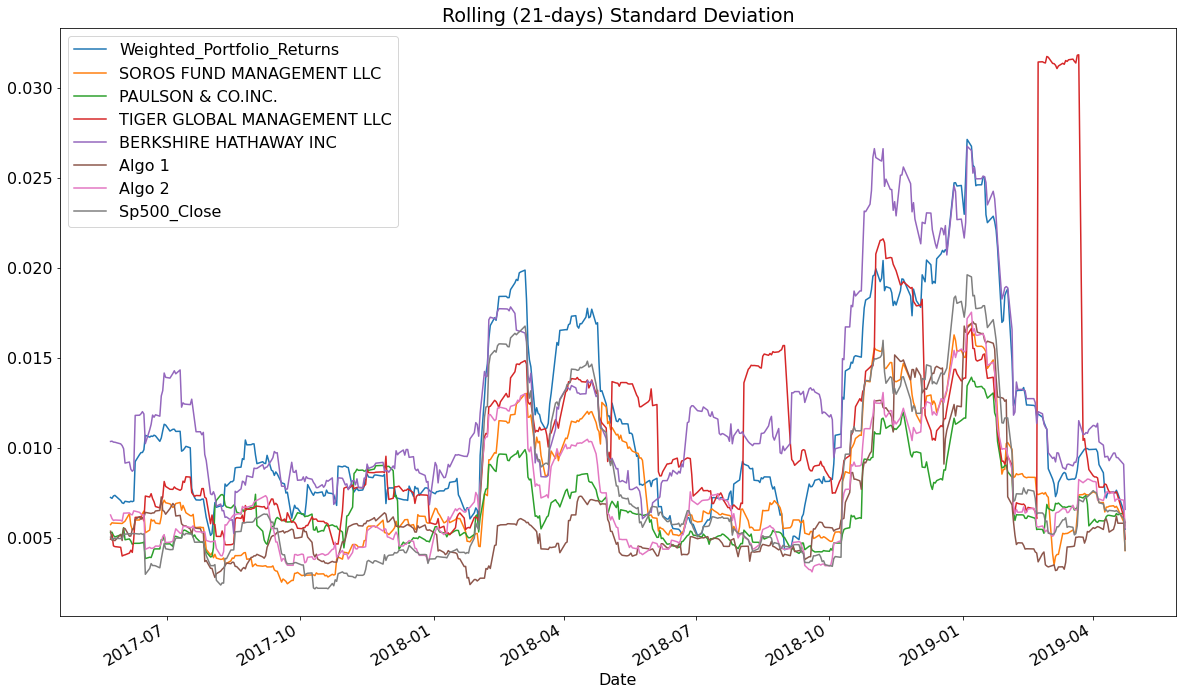

In [158]:
# Plot rolling standard deviation (set parameters and size the graph)

plt.rcParams.update({'font.size': 16})
combined_rolling_21_std.plot(figsize =(20, 12), title= "Rolling (21-days) Standard Deviation",legend = True)

### Calculate and plot the correlation

In [159]:
# Calculate correlation

portfolio_correlation = combined_data.corr()
portfolio_correlation

,Weighted_Portfolio_Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Close
Weighted_Portfolio_Returns,1.000000,0.688898,0.557369,0.470568,0.750560,0.195966,0.716304,0.850783
SOROS FUND MANAGEMENT LLC,0.688898,1.000000,0.710870,0.501430,0.766382,0.282130,0.801482,0.819640
PAULSON & CO.INC.,0.557369,0.710870,1.000000,0.456646,0.583439,0.292587,0.734563,0.712386
TIGER GLOBAL MANAGEMENT LLC,0.470568,0.501430,0.456646,1.000000,0.367851,0.109245,0.457681,0.547903
BERKSHIRE HATHAWAY INC,0.750560,0.766382,0.583439,0.367851,1.000000,0.250951,0.747733,0.807978
Algo 1,0.195966,0.282130,0.292587,0.109245,0.250951,1.000000,0.289058,0.244845
Algo 2,0.716304,0.801482,0.734563,0.457681,0.747733,0.289058,1.000000,0.872520
Sp500_Close,0.850783,0.819640,0.712386,0.547903,0.807978,0.244845,0.872520,1.000000


Text(0.5, 1.0, 'Portfolio Correlation Map')

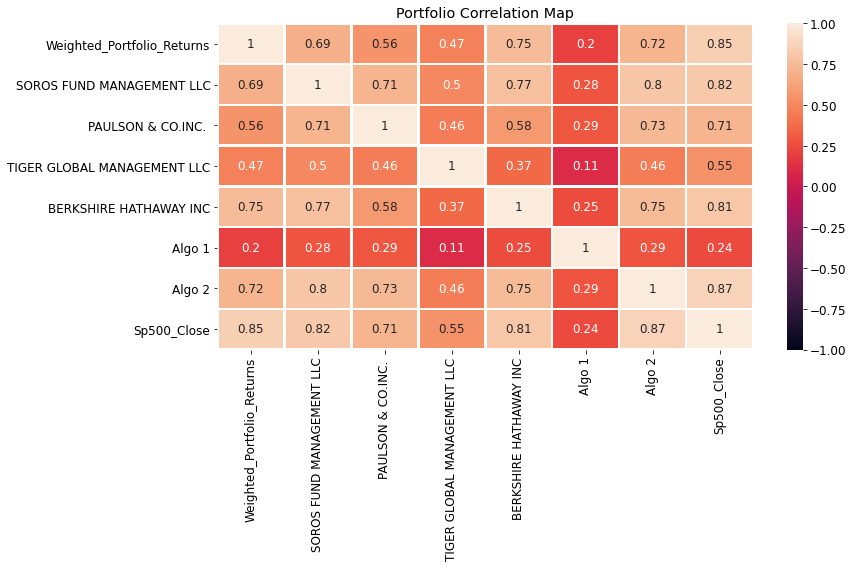

In [160]:
# Plot Correlation (set parameters and size the graph)

plt.rcParams.update({'font.size': 12})
ac = plt.subplots(figsize=(12,6))
ac= sns.heatmap(round(portfolio_correlation, 3), vmin=-1, vmax=1, annot=True, linewidths=1.5)
ac.set_title("Portfolio Correlation Map")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [161]:
# Calculate and plot Beta

portfolio_covariance = combined_data['Weighted_Portfolio_Returns'].rolling(window=60).cov(combined_data['Sp500_Close'])

# Calculate variance of S&P 500 (rolling 60 days window)

sp500_variance_1 = combined_data['Sp500_Close'].rolling(window=60).var()

In [162]:
# Calculate Beta

portfolio_beta = portfolio_covariance / sp500_variance_1
portfolio_beta

Date
2017-04-25         NaN
2017-04-26         NaN
2017-04-27         NaN
2017-04-28         NaN
2017-05-01         NaN
                ...   
2019-04-16    1.173067
2019-04-17    1.137584
2019-04-18    1.138013
2019-04-22    1.137411
2019-04-23    1.128589
Length: 498, dtype: float64

In [163]:
# Drop NA 

portfolio_beta.dropna(inplace = True)
portfolio_beta

Date
2017-07-19    1.166093
2017-07-20    1.168387
2017-07-21    1.173742
2017-07-24    1.160419
2017-07-25    1.179233
                ...   
2019-04-16    1.173067
2019-04-17    1.137584
2019-04-18    1.138013
2019-04-22    1.137411
2019-04-23    1.128589
Length: 439, dtype: float64

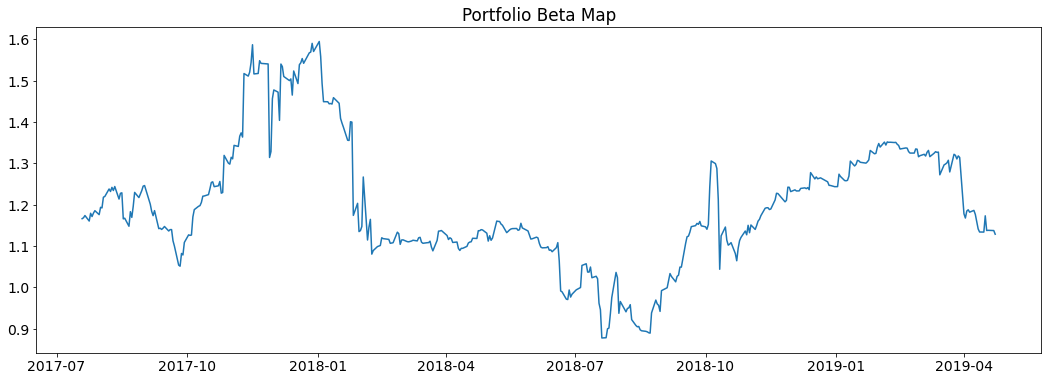

In [164]:
# Plot beta (set parameters and size the graph)

plt.rcParams.update({'font.size': 14})
plt.subplots(figsize=(18,6))
plt.title(("Portfolio Beta Map"))
plt.plot(portfolio_beta)


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [165]:
# Calculate Annualzied Sharpe Ratios

portfolio_sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
portfolio_sharpe_ratios

Weighted_Portfolio_Returns     1.247069
SOROS FUND MANAGEMENT LLC      0.472046
PAULSON & CO.INC.             -0.327770
TIGER GLOBAL MANAGEMENT LLC   -1.112624
BERKSHIRE HATHAWAY INC         1.047952
Algo 1                         1.479951
Algo 2                         0.684591
Sp500_Close                    0.999110
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios Analysis'}>

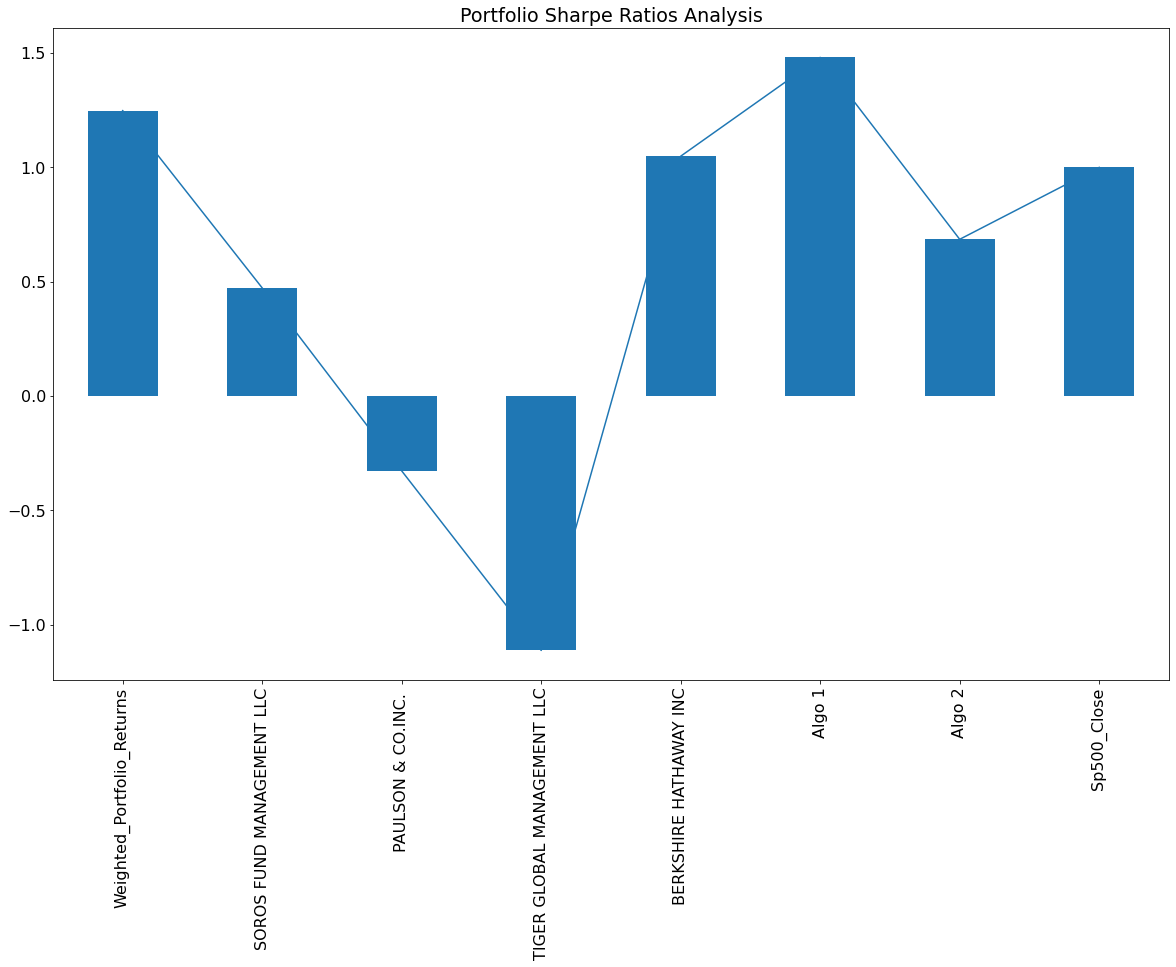

In [166]:
# Visualize the sharpe ratios as a bar plot (set parameters and size the graph)
# I used both bar and line graphs(merged-in) for better visualization

plt.rcParams.update({'font.size': 16})
portfolio_sharpe_ratios.plot(figsize = (20, 12))
portfolio_sharpe_ratios.plot(kind='bar', title = "Portfolio Sharpe Ratios Analysis")

### How does your portfolio do?

## Takeaways:

- Even though my evenly weighted portfolio of (GOOG, AAPL, COST) was one of the riskiest portfolios - per   risk analysis findings - it did outperform , plus(20%), S&P 500 market.
- Overall, Algo1 (with condensed calculated period and longer historical calculated period) was the best     performing portfolio for the calculated period.